<a href="https://colab.research.google.com/github/Girisha-Malni-builds01/EDA-MiniProject/blob/main/EDA_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
weather <- read.csv("/content/weatherAUS.csv")


In [3]:
# Keep only useful columns
weather <- weather[, c("MinTemp", "MaxTemp", "Rainfall",
                       "Humidity9am", "Humidity3pm", "Temp3pm", "RainTomorrow")]
weather <- na.omit(weather)
weather$RainTomorrow <- as.factor(weather$RainTomorrow)

# Normalize
normalize <- function(x) (x - min(x)) / (max(x) - min(x))
weather_norm <- as.data.frame(lapply(weather[,1:6], normalize))
weather_norm$RainTomorrow <- weather$RainTomorrow

# Split into train/test
set.seed(123)
n <- nrow(weather_norm)
train_index <- sample(1:n, 0.8*n)
train_data <- weather_norm[train_index, 1:6]
test_data  <- weather_norm[-train_index, 1:6]
train_label <- weather_norm[train_index, 7]
test_label  <- weather_norm[-train_index, 7]

# Run KNN
library(class)
pred <- knn(train_data, test_data, cl=train_label, k=5)

# Evaluate
conf_matrix <- table(Predicted=pred, Actual=test_label)
print(conf_matrix)
accuracy <- sum(diag(conf_matrix))/sum(conf_matrix)
cat("✅ Model Accuracy =", round(accuracy*100,2), "%\n")


         Actual
Predicted    No   Yes
      No  19841  3462
      Yes  1448  2547
✅ Model Accuracy = 82.01 %


    MinTemp         MaxTemp        MaxTemp.1        Rainfall      
 Min.   :-8.50   Min.   :-4.80   Min.   :-4.80   Min.   :  0.000  
 1st Qu.: 7.60   1st Qu.:17.90   1st Qu.:17.90   1st Qu.:  0.000  
 Median :12.00   Median :22.70   Median :22.70   Median :  0.000  
 Mean   :12.16   Mean   :23.23   Mean   :23.23   Mean   :  2.321  
 3rd Qu.:16.80   3rd Qu.:28.20   3rd Qu.:28.20   3rd Qu.:  0.600  
 Max.   :33.90   Max.   :48.10   Max.   :48.10   Max.   :371.000  
  Humidity9am      Humidity3pm       Temp3pm     
 Min.   :  0.00   Min.   :  0.0   Min.   :-5.40  
 1st Qu.: 57.00   1st Qu.: 36.0   1st Qu.:16.60  
 Median : 70.00   Median : 52.0   Median :21.10  
 Mean   : 68.77   Mean   : 51.4   Mean   :21.72  
 3rd Qu.: 83.00   3rd Qu.: 66.0   3rd Qu.:26.40  
 Max.   :100.00   Max.   :100.0   Max.   :46.70  

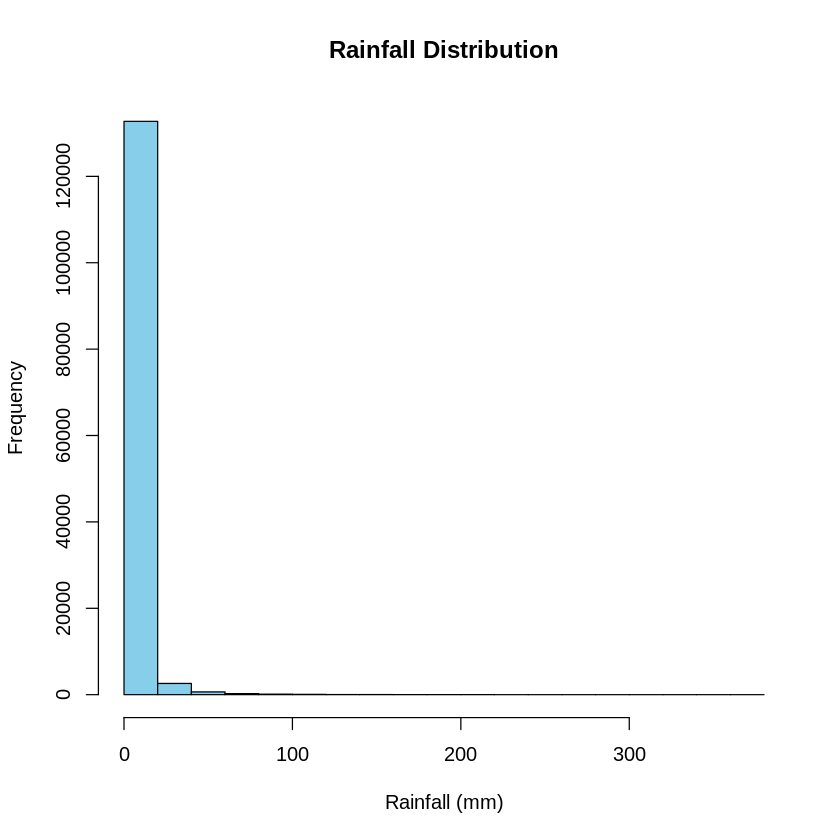

In [4]:
summary(weather[, c("MinTemp","MaxTemp","MaxTemp","Rainfall","Humidity9am","Humidity3pm","Temp3pm")])

# 2️⃣ Histogram of Rainfall
hist(weather$Rainfall, main="Rainfall Distribution", xlab="Rainfall (mm)", col="skyblue", border="black")

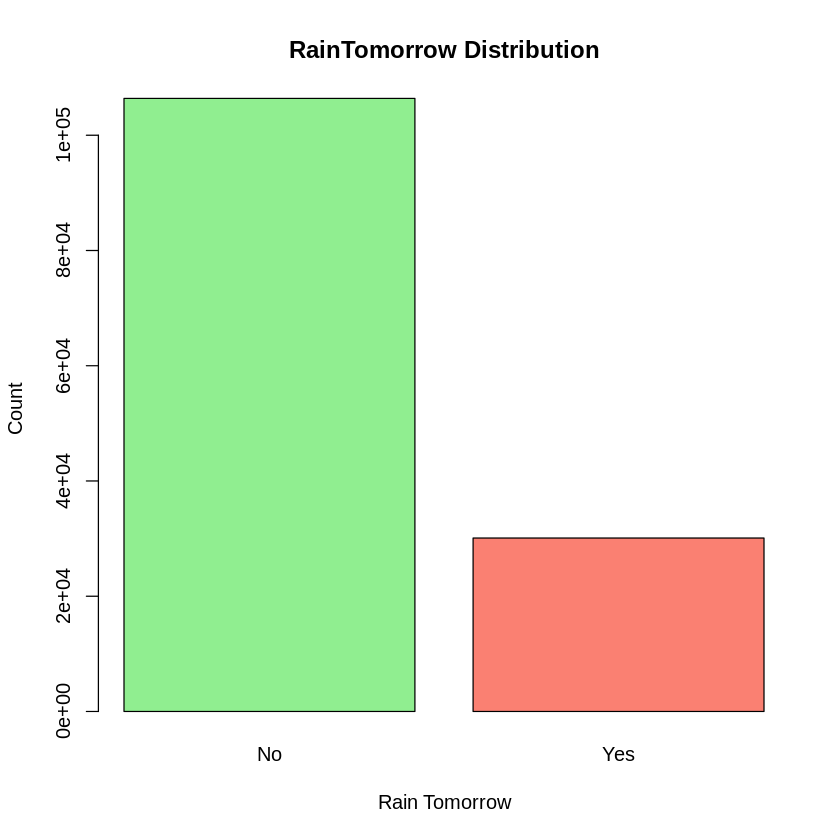

In [5]:
# -----------------------------
# Bar plot for RainTomorrow distribution
# -----------------------------
table_rain <- table(weather$RainTomorrow)
barplot(table_rain, main="RainTomorrow Distribution", col=c("lightgreen","salmon"),
        ylab="Count", xlab="Rain Tomorrow", border="black")
